# E2SFCA

In [67]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

#demand_data: population data, GID = population grid's ID, pop = population in each grid
demand_data = pd.read_csv('popgrid.csv', low_memory = False)
demand_df = pd.DataFrame(demand_data)
demand_df[['GID']]=demand_df[['GID']].astype(int)
demand_df[['pop']]=demand_df[['pop']].astype(int)

#health_data: health facility data,  ID = health' ID, beds = health's capacity ( number of beds)
health_data =  pd.read_csv('facility.csv', low_memory = False)
health_df = pd.DataFrame(health_data)
health_df[['ID']]=health_df [['ID']].astype(int)
health_df[['beds']]=health_df[['beds']].astype(float)


#cost_data: distance matrix, cost = distance between each grid and each facility ( Distance: network distance in Qgis, travel costs=fastest path)
cost_data = pd.read_csv('distanceMatrix.csv', low_memory = False)
cost_df = pd.DataFrame(cost_data)


cost_df[['origin_id']]=cost_df[['origin_id']].astype(int)
cost_df[['destination_id']]=cost_df[['destination_id']].astype(int)
cost_df[['cost']]=cost_df[['total_cost']].astype(float)
cost_df.drop(['entry_cost', 'network_cost','exit_cost','total_cost'], axis=1, inplace=True)


cost_df=cost_df.rename(columns = {'origin_id':'GID','destination_id':'ID'}, inplace = False)



cost_df[['GID']]=cost_df[['GID']].astype(int)
cost_df[['ID']]=cost_df[['ID']].astype(int)
cost_df[['cost']]=cost_df[['cost']].astype(float)



#linking the distance matrix with the population demand 
temp1 = pd.merge(cost_df, demand_df, how='left', on = 'GID')
temp1[['pop']]= temp1[['pop']].astype(float)



#delete the 0 population unit
temp1.drop(temp1.loc[temp1['pop']==0].index, inplace = True)


#changing the travel time from seconds to minutes
temp1['mint']=temp1['cost']/60



def f(x,beta):
    return np.exp(-x*x/beta)

def poids(x,beta,cach_area):
    d=np.arange(0,cach_area+1,5)
    n=len(d)
    for i in range(n-1):
        if x>=d[i] and x<d[i+1]:
            return f(d[i],beta)
    return 0

temp1['w1']=[poids(temp1.iloc[i]['mint'],266,35)for i in range(len(temp1))]


# calculate the weighted population 
temp1['pop2'] = temp1['w1']*temp1['pop']


temp2 = temp1.groupby(['ID'])['pop2'].sum()
temp2 = temp2.to_frame()
temp2 = temp2.rename(columns={'pop2':'vj'})
temp2 = pd.merge(temp2, health_df, how='left', on = 'ID')
temp2 = temp2.drop(["Nom", "X","Y"], axis=1)



# Step2: For each facility, calculate its supply-demand ratios.
#linking the distance matrix (along with population) with the facilities 
temp3 = pd.merge(temp1, temp2, how='left', on = 'ID')


# For each pair distance martix, calculate the Accessibility using E2SFCA
temp3['R']= temp3.apply(lambda x: x['w1']*x['beds']*1000/x['vj'] if x['vj'] != 0 else 0, axis=1)


# Step3: For each grid, add up all the supply-demand ratios of the facilities which fall in its catchment
E2SFCA = temp3.groupby(['GID'])['R'].sum()
E2SFCA = E2SFCA.to_frame()
E2SFCA



#E2FCA = E2FCA.rename(columns={'R':'healthAccess'})
E2SFCA['GID']=E2SFCA.index
E2SFCA = E2SFCA.reset_index(drop = True)
E2SFCA['X']=demand_df['X']
E2SFCA['Y']=demand_df['Y']

E2SFCA.to_csv('E2SFCA.csv',index= None)


E2SFCA
 



,R,GID,X,Y
0,0.139441,54,-7.512500,33.629167
1,0.096576,55,-7.504167,33.629167
2,0.301341,83,-7.529167,33.620833
3,0.202607,84,-7.520833,33.620833
4,0.200532,85,-7.512500,33.620833
...,...,...,...,...
283,0.052424,598,-7.629167,33.479167
284,0.052424,599,-7.620833,33.479167
285,0.015306,624,-7.670833,33.470833
286,0.021820,625,-7.662500,33.470833


# KD2SFCA

In [68]:
#demand_data: population data, GID = population grid's ID, pop = population in each grid
demand_data = pd.read_csv('popgrid.csv', low_memory = False)
demand_df = pd.DataFrame(demand_data)
demand_df[['GID']]=demand_df[['GID']].astype(int)
demand_df[['pop']]=demand_df[['pop']].astype(int)

#health_data: health facility data,  ID = health' ID, beds = health's capacity ( number of beds)
health_data =  pd.read_csv('facility.csv', low_memory = False)
health_df = pd.DataFrame(health_data)
health_df[['ID']]=health_df [['ID']].astype(int)
health_df[['beds']]=health_df[['beds']].astype(float)


#cost_data: distance matrix, cost = distance between each grid and each facility 
cost_data = pd.read_csv('distanceMatrix.csv', low_memory = False)
cost_df = pd.DataFrame(cost_data)


cost_df[['origin_id']]=cost_df[['origin_id']].astype(int)
cost_df[['destination_id']]=cost_df[['destination_id']].astype(int)
cost_df[['cost']]=cost_df[['total_cost']].astype(float)
cost_df.drop(['entry_cost', 'network_cost','exit_cost','total_cost'], axis=1, inplace=True)


cost_df=cost_df.rename(columns = {'origin_id':'GID','destination_id':'ID'}, inplace = False)



cost_df[['GID']]=cost_df[['GID']].astype(int)
cost_df[['ID']]=cost_df[['ID']].astype(int)
cost_df[['cost']]=cost_df[['cost']].astype(float)



#linking the distance matrix with the population demand 
temp1 = pd.merge(cost_df, demand_df, how='left', on = 'GID')
temp1[['pop']]= temp1[['pop']].astype(float)
temp1


#delete the 0 population unit
temp1.drop(temp1.loc[temp1['pop']==0].index, inplace = True)


#changing the travel time from seconds to minutes
temp1['mint']=temp1['cost']/60
temp1


temp1['w1']= temp1.apply(lambda x: math.exp(-(np.square(x['mint'])/266)) if x['mint'] <=35 else 0, axis=1)




# calculate the weighted population 
temp1['pop2'] = temp1['w1']*temp1['pop']


temp2 = temp1.groupby(['ID'])['pop2'].sum()
temp2 = temp2.to_frame()
temp2 = temp2.rename(columns={'pop2':'vj'})
temp2 = pd.merge(temp2, health_df, how='left', on = 'ID')
temp2 = temp2.drop(["Nom", "X","Y"], axis=1)


# Step2: For each facility, calculate its supply-demand ratios.
#linking the distance matrix (along with population) with the facilities 
temp3 = pd.merge(temp1, temp2, how='left', on = 'ID')


# For each pair distance martix, calculate the Accessibility
temp3['R']= temp3.apply(lambda x: x['w1']*x['beds']*1000/x['vj'] if x['vj'] != 0 else 0, axis=1)


# Step3: For each grid, add up all the supply-demand ratios of the facilities which fall in its catchment
KD2SFCA = temp3.groupby(['GID'])['R'].sum()
KD2SFCA= KD2SFCA.to_frame()
KD2SFCA



KD2SFCA['GID']=KD2SFCA.index
KD2SFCA= KD2SFCA.reset_index(drop = True)

KD2SFCA['X']=demand_df['X']
KD2SFCA['Y']=demand_df['Y']

KD2SFCA.to_csv('KD2SFCA.csv',index= None)

KD2SFCA


,R,GID,X,Y
0,0.102771,54,-7.512500,33.629167
1,0.076750,55,-7.504167,33.629167
2,0.263784,83,-7.529167,33.620833
3,0.168574,84,-7.520833,33.620833
4,0.155042,85,-7.512500,33.620833
...,...,...,...,...
283,0.048226,598,-7.629167,33.479167
284,0.049084,599,-7.620833,33.479167
285,0.013343,624,-7.670833,33.470833
286,0.018445,625,-7.662500,33.470833


In [69]:
KD2SFCA.describe()

,R,GID,X,Y
count,288.000000,288.000000,288.000000,288.000000
mean,0.716449,298.916667,-7.594705,33.560677
std,0.482134,130.670317,0.059517,0.035963
min,0.013343,54.000000,-7.704167,33.470833
25%,0.277006,199.750000,-7.645833,33.537500
50%,0.672103,282.500000,-7.604167,33.562500
75%,1.107925,384.250000,-7.545833,33.587500
max,1.663618,626.000000,-7.470833,33.629167


# 3SFCA

In [70]:

#demand_data: population data, GID = population grid's ID, pop = population in each grid
demand_data = pd.read_csv('popgrid.csv', low_memory = False)
demand_df = pd.DataFrame(demand_data)
demand_df[['GID']]=demand_df[['GID']].astype(int)
demand_df[['pop']]=demand_df[['pop']].astype(int)

#health_data: health facility data,  ID = health' ID, beds = health's capacity ( number of beds)
health_data =  pd.read_csv('facility.csv', low_memory = False)
health_df = pd.DataFrame(health_data)
health_df[['ID']]=health_df [['ID']].astype(int)
health_df[['beds']]=health_df[['beds']].astype(float)


#cost_data: distance matrix, cost = distance between each grid and each facility ( network distance, travel costs=fastest path)
cost_data = pd.read_csv('distanceMatrix.csv', low_memory = False)
cost_df = pd.DataFrame(cost_data)


cost_df[['origin_id']]=cost_df[['origin_id']].astype(int)
cost_df[['destination_id']]=cost_df[['destination_id']].astype(int)
cost_df[['cost']]=cost_df[['total_cost']].astype(float)
cost_df.drop(['entry_cost', 'network_cost','exit_cost','total_cost'], axis=1, inplace=True)


cost_df=cost_df.rename(columns = {'origin_id':'GID','destination_id':'ID'}, inplace = False)
cost_df[['GID']]=cost_df[['GID']].astype(int)
cost_df[['ID']]=cost_df[['ID']].astype(int)
cost_df[['cost']]=cost_df[['cost']].astype(float)


#linking the distance matrix with the population demand 
temp1 = pd.merge(cost_df, demand_df, how='left', on = 'GID')
temp1[['pop']]= temp1[['pop']].astype(float)
#delete the 0 population unit
temp1.drop(temp1.loc[temp1['pop']==0].index, inplace = True)
#changing the travel time from seconds to minutes
temp1['mint']=temp1['cost']/60

temp1['w1']= temp1.apply(lambda x: math.exp(-(np.square(x['mint'])/266)) if x['mint'] <=35 else 0, axis=1)


# calculate the weighted population 
temp1['pop2'] = temp1['w1']*temp1['pop']


# Step 0： For each pop grid, sum up all the distance weights 
SUMW = temp1.groupby(['GID'])['w1'].sum()
SUMW = SUMW.to_frame()
SUMW['GID']=SUMW.index
SUMW=SUMW.reset_index(drop = True)
SUMW= SUMW.rename(columns={'w1':'SUMW'})
s = SUMW['SUMW'].sum()

#linking the distance matrix with population demand
temp_w = pd.merge(temp1,SUMW, how='left',on = 'GID')
# calculate the supplie weights (SW) of each facility
# Figure out each facility has how much share of each grid popultion SW = W1 / SUMW
temp_w['sw']=temp_w.apply(lambda x:x['w1']/s, axis=1)
# ensure the data type is correct
temp_w[['sw']]=temp_w[['sw']].astype(float)
temp_w[['GID']]=temp_w[['GID']].astype(int)
# new weighted pop = original population * distance weights * suppliers weights 
temp1['pop'] = temp_w.apply(lambda x: x['pop2']*x['sw'],axis=1)

temp1['sw']=temp_w['sw']

#Step 1: For each hospiTAL calculate its service population, that is sum up all the weighted pop of the unit within its catchment
temp2 = temp1.groupby(['ID'])['pop'].sum()
temp2 = temp2.to_frame()
temp2 = pd.merge(temp2, health_df, how='left', on = 'ID')
temp2 = temp2.drop(["Nom", "X","Y"], axis=1)
temp2 = temp2.rename(columns={'pop':'SUMP'})


# Step2: For each facility, calculate its supply-demand ratios.
#linking the distance matrix (along with population) with the schools
temp3 = pd.merge(temp1, temp2, how='left', on = 'ID')


temp3['D']= temp3.apply(lambda x: x['beds']*1000/x['SUMP'] if x['SUMP'] != 0 else 0, axis=1)

temp3['R']= temp3.apply(lambda x: x['D']*x['w1']*x['sw'] , axis=1)

# Step3: For each grid, add up all the supply-demand ratios of the facilities which fall in its catchment
TSFCA = temp3.groupby(['GID'])['R'].sum()
TSFCA = TSFCA.to_frame()
TSFCA['GID']= TSFCA.index
TSFCA = TSFCA.reset_index(drop = True)

TSFCA['X']=demand_df['X']
TSFCA['Y']=demand_df['Y']

TSFCA.to_csv('TSFCA.csv',index= None)


In [71]:
TSFCA.describe()

,R,GID,X,Y
count,288.000000,288.000000,288.000000,288.000000
mean,0.785950,298.916667,-7.594705,33.560677
std,0.772401,130.670317,0.059517,0.035963
min,0.000588,54.000000,-7.704167,33.470833
25%,0.132606,199.750000,-7.645833,33.537500
50%,0.485476,282.500000,-7.604167,33.562500
75%,1.296923,384.250000,-7.545833,33.587500
max,2.833951,626.000000,-7.470833,33.629167


# MSFCA


In [72]:
#demand_data: population data, GID = population grid's ID, pop = population in each grid
demand_data = pd.read_csv('popgrid.csv', low_memory = False)
demand_df = pd.DataFrame(demand_data)
demand_df[['GID']]=demand_df[['GID']].astype(int)
demand_df[['pop']]=demand_df[['pop']].astype(int)

#health_data: health facility data,  ID = health' ID, beds = health's capacity ( number of beds)
health_data =  pd.read_csv('facility.csv', low_memory = False)
health_df = pd.DataFrame(health_data)
health_df[['ID']]=health_df [['ID']].astype(int)
health_df[['beds']]=health_df[['beds']].astype(float)


#cost_data: distance matrix, cost = distance between each grid and each facility ( network distance, travel costs=fastest path)
cost_data = pd.read_csv('distanceMatrix.csv', low_memory = False)
cost_df = pd.DataFrame(cost_data)


cost_df[['origin_id']]=cost_df[['origin_id']].astype(int)
cost_df[['destination_id']]=cost_df[['destination_id']].astype(int)
cost_df[['cost']]=cost_df[['total_cost']].astype(float)
cost_df.drop(['entry_cost', 'network_cost','exit_cost','total_cost'], axis=1, inplace=True)


cost_df=cost_df.rename(columns = {'origin_id':'GID','destination_id':'ID'}, inplace = False)



cost_df[['GID']]=cost_df[['GID']].astype(int)
cost_df[['ID']]=cost_df[['ID']].astype(int)
cost_df[['cost']]=cost_df[['cost']].astype(float)



#linking the distance matrix with the population demand 
temp1 = pd.merge(cost_df, demand_df, how='left', on = 'GID')
temp1[['pop']]= temp1[['pop']].astype(float)
temp1


#delete the 0 population unit
temp1.drop(temp1.loc[temp1['pop']==0].index, inplace = True)


#changing the travel time from seconds to minutes
temp1['mint']=temp1['cost']/60
temp1


temp1['w1']= temp1.apply(lambda x: math.exp(-(np.square(x['mint'])/266)) if x['mint'] <=35 else 0, axis=1)

 
# calculate the weighted population 
temp1['pop2'] = temp1['w1']*temp1['pop']


temp2 = temp1.groupby(['ID'])['pop2'].sum()
temp2 = temp2.to_frame()
temp2 = temp2.rename(columns={'pop2':'vj'})
temp2 = pd.merge(temp2, health_df, how='left', on = 'ID')
temp2 = temp2.drop(["Nom", "X","Y"], axis=1)


# Step2: For each facility, calculate its supply-demand ratios.
#linking the distance matrix (along with population) with the facilities 
temp3 = pd.merge(temp1, temp2, how='left', on = 'ID')

temp3['D']= temp3.apply(lambda x: x['w1']*x['beds']*1000/x['vj'] if x['vj'] != 0 else 0, axis=1)
temp3['R']= temp3.apply(lambda x: x['D']*x['w1'], axis=1)



# Step3: For each grid, add up all the supply-demand ratios of the facilities which fall in its catchment
M2SFCA = temp3.groupby(['GID'])['R'].sum()
M2SFCA = M2SFCA.to_frame()
M2SFCA['GID']= M2SFCA.index
M2SFCA = M2SFCA.reset_index(drop = True)



M2SFCA['X']=demand_df['X']
M2SFCA['Y']=demand_df['Y']

M2SFCA.to_csv('M2SFCA.csv',index= None)


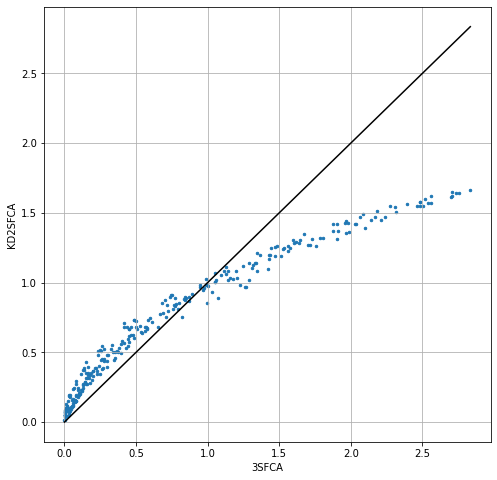

In [73]:
L1=list(TSFCA['R'])
L2=list(KD2SFCA['R'])
plt.figure(figsize=[8,8])
plt.scatter(L1,L2,s=6)
plt.xlabel('3SFCA')
plt.ylabel('KD2SFCA')
x=[min(L1),max(L1)]
plt.plot(x,x,'k')
plt.grid()
plt.savefig('1.eps', format='eps')
plt.show()
# Saving the figure.


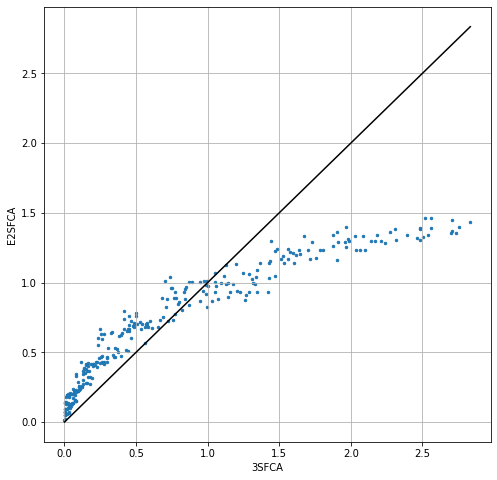

In [74]:
L1=list(TSFCA['R'])
L2=list(E2SFCA['R'])
plt.figure(figsize=[8,8])
plt.scatter(L1,L2,s=6)
plt.xlabel('3SFCA')
plt.ylabel('E2SFCA')
x=[min(L1),max(L1)]
plt.plot(x,x,'k')
plt.grid()
plt.savefig('2.eps', format='eps')
plt.show()


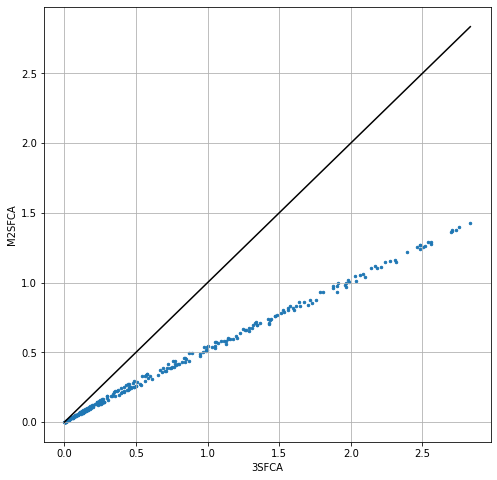

In [75]:
L1=list(TSFCA['R'])
L2=list(M2SFCA['R'])
plt.figure(figsize=[8,8])
plt.scatter(L1,L2,s=6)
plt.xlabel('3SFCA')
plt.ylabel('M2SFCA')
x=[min(L1),max(L1)]
plt.plot(x,x,'k')
plt.grid()
plt.savefig('3.eps', format='eps')
plt.show()


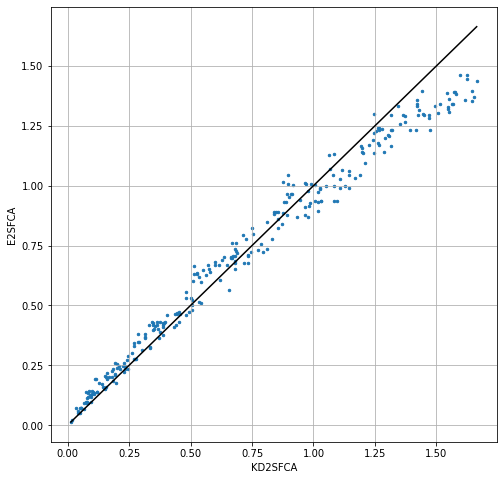

In [76]:
L1=list(KD2SFCA['R'])
L2=list(E2SFCA['R'])
plt.figure(figsize=[8,8])
plt.scatter(L1,L2,s=6)
plt.xlabel('KD2SFCA')
plt.ylabel('E2SFCA')
x=[min(L1),max(L1)]
plt.plot(x,x,'k')
plt.grid()
plt.savefig('4.eps', format='eps')
plt.show()


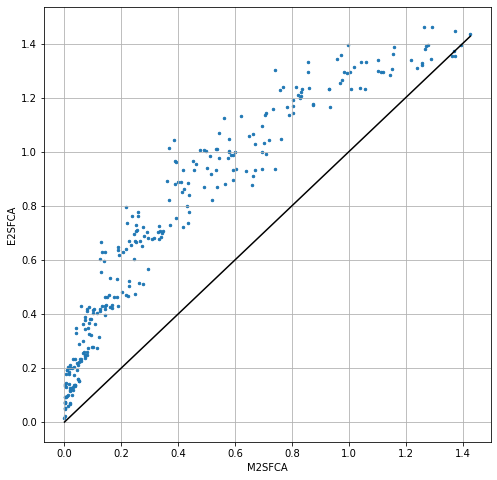

In [77]:
L1=list(M2SFCA['R'])
L2=list(E2SFCA['R'])
plt.figure(figsize=[8,8])
plt.scatter(L1,L2,s=6)
plt.xlabel('M2SFCA')
plt.ylabel('E2SFCA')
x=[min(L1),max(L1)]
plt.plot(x,x,'k')
plt.grid()
plt.savefig('5.eps', format='eps')
plt.show()


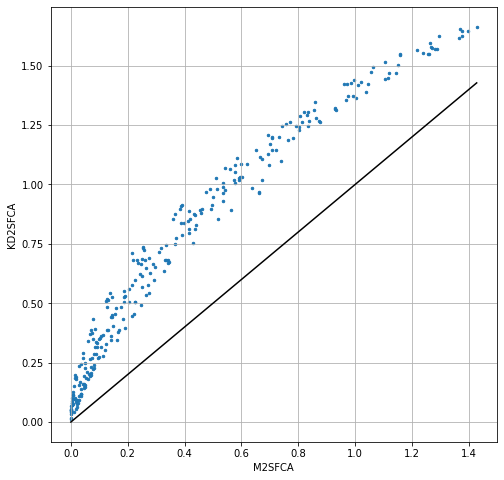

In [78]:
L1=list(M2SFCA['R'])
L2=list(KD2SFCA['R'])
plt.figure(figsize=[8,8])
plt.scatter(L1,L2,s=6)
plt.xlabel('M2SFCA')
plt.ylabel('KD2SFCA')
x=[min(L1),max(L1)]
plt.plot(x,x,'k')
plt.grid()
plt.savefig('6.eps', format='eps')
plt.show()


In [79]:
E2SFCA['R'].describe()

count    288.000000
mean       0.700711
std        0.422864
min        0.015306
25%        0.320671
50%        0.692900
75%        1.043171
max        1.462474
Name: R, dtype: float64

In [80]:
KD2SFCA['R'].describe()

count    288.000000
mean       0.716449
std        0.482134
min        0.013343
25%        0.277006
50%        0.672103
75%        1.107925
max        1.663618
Name: R, dtype: float64

In [81]:
TSFCA['R'].describe()

count    288.000000
mean       0.785950
std        0.772401
min        0.000588
25%        0.132606
50%        0.485476
75%        1.296923
max        2.833951
Name: R, dtype: float64

In [82]:
M2SFCA['R'].describe()

count    288.000000
mean       0.410149
std        0.388893
min        0.000311
25%        0.077916
50%        0.268203
75%        0.671385
max        1.427156
Name: R, dtype: float64